In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.drop("Unnamed: 0", axis=1, inplace= True)

In [4]:
df.head()

,date,open,high,low,close
0,1502942400000,4261.48,4261.48,4261.48,4261.48
1,1502942460000,4261.48,4261.48,4261.48,4261.48
2,1502942520000,4280.56,4280.56,4280.56,4280.56
3,1502942580000,4261.48,4261.48,4261.48,4261.48
4,1502942640000,4261.48,4261.48,4261.48,4261.48


In [5]:
df['L14'] = df['low'].rolling(window=14).min()
#Create the "H14" column in the DataFrame
df['H14'] = df['high'].rolling(window=14).max()
#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['close'] - df['L14']) / (df['H14'] - df['L14']) )
#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

In [6]:
df

,date,open,high,low,close,L14,H14,%K,%D
0,1502942400000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN
1,1502942460000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN
2,1502942520000,4280.56,4280.56,4280.56,4280.56,NaN,NaN,NaN,NaN
3,1502942580000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN
4,1502942640000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1867642,1615460340000,55517.42,55575.86,55500.00,55530.60,55090.00,55612.95,84.252797,85.142312
1867643,1615460400000,55530.59,55675.00,55530.58,55673.88,55090.00,55675.00,99.808547,88.598578
1867644,1615460460000,55673.87,55680.00,55570.72,55596.02,55090.00,55680.00,85.766102,89.942482
1867645,1615460520000,55596.02,55746.30,55596.02,55746.29,55155.48,55746.30,99.998307,95.190985


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Oscillator')

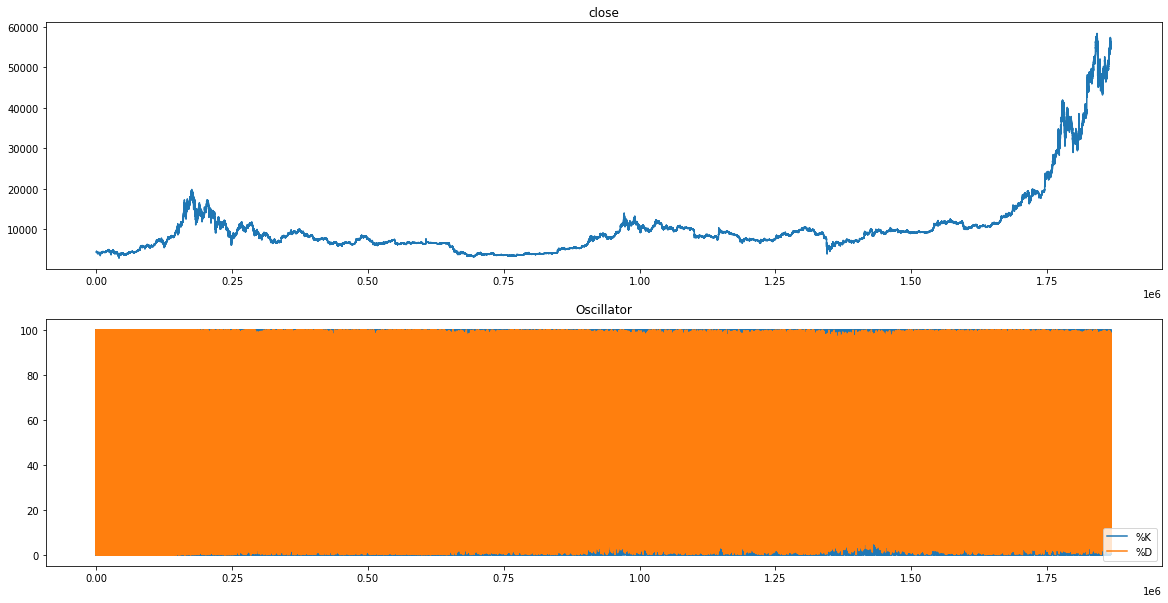

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
df['close'].plot(ax=axes[0]); axes[0].set_title('close')
df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')

In [9]:
df['Sell Entry'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > 80) 
#Create a column in the DataFrame showing "TRUE" if sell exit signal is given and "FALSE" otherwise. 
#A sell exit signal is given when the %K line crosses back up through the %D line 
df['Sell Exit'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) 
#create a placeholder column to populate with short positions (-1 for short and 0 for flat) using boolean values created above 


In [10]:
df

,date,open,high,low,close,L14,H14,%K,%D,Sell Entry,Sell Exit
0,1502942400000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False
1,1502942460000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False
2,1502942520000,4280.56,4280.56,4280.56,4280.56,NaN,NaN,NaN,NaN,False,False
3,1502942580000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False
4,1502942640000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1867642,1615460340000,55517.42,55575.86,55500.00,55530.60,55090.00,55612.95,84.252797,85.142312,False,False
1867643,1615460400000,55530.59,55675.00,55530.58,55673.88,55090.00,55675.00,99.808547,88.598578,False,True
1867644,1615460460000,55673.87,55680.00,55570.72,55596.02,55090.00,55680.00,85.766102,89.942482,True,False
1867645,1615460520000,55596.02,55746.30,55596.02,55746.29,55155.48,55746.30,99.998307,95.190985,False,True


In [11]:
df['Short'] = np.nan 
df.loc[df['Sell Entry'],'Short'] = -1 
df.loc[df['Sell Exit'],'Short'] = 0 
#Set initial position on day 1 to flat 
df['Short'][0] = 0 
#Forward fill the position column to represent the holding of positions through time 
df['Short'] = df['Short'].fillna(method='pad') 
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 


/home/mitho/Documents/BTC/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
df

,date,open,high,low,close,L14,H14,%K,%D,Sell Entry,Sell Exit,Short
0,1502942400000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0
1,1502942460000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0
2,1502942520000,4280.56,4280.56,4280.56,4280.56,NaN,NaN,NaN,NaN,False,False,0.0
3,1502942580000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0
4,1502942640000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1867642,1615460340000,55517.42,55575.86,55500.00,55530.60,55090.00,55612.95,84.252797,85.142312,False,False,-1.0
1867643,1615460400000,55530.59,55675.00,55530.58,55673.88,55090.00,55675.00,99.808547,88.598578,False,True,0.0
1867644,1615460460000,55673.87,55680.00,55570.72,55596.02,55090.00,55680.00,85.766102,89.942482,True,False,-1.0
1867645,1615460520000,55596.02,55746.30,55596.02,55746.29,55155.48,55746.30,99.998307,95.190985,False,True,0.0


In [13]:
df['Buy Entry'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < 20) 
#Create a column in the DataFrame showing "TRUE" if buy exit signal is given and "FALSE" otherwise. 
#A buy exit signal is given when the %K line crosses back down through the %D line 
df['Buy Exit'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) 
#create a placeholder column to polulate with long positions (1 for long and 0 for flat) using boolean values created above 


In [14]:
df

,date,open,high,low,close,L14,H14,%K,%D,Sell Entry,Sell Exit,Short,Buy Entry,Buy Exit
0,1502942400000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False
1,1502942460000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False
2,1502942520000,4280.56,4280.56,4280.56,4280.56,NaN,NaN,NaN,NaN,False,False,0.0,False,False
3,1502942580000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False
4,1502942640000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867642,1615460340000,55517.42,55575.86,55500.00,55530.60,55090.00,55612.95,84.252797,85.142312,False,False,-1.0,False,False
1867643,1615460400000,55530.59,55675.00,55530.58,55673.88,55090.00,55675.00,99.808547,88.598578,False,True,0.0,False,False
1867644,1615460460000,55673.87,55680.00,55570.72,55596.02,55090.00,55680.00,85.766102,89.942482,True,False,-1.0,False,True
1867645,1615460520000,55596.02,55746.30,55596.02,55746.29,55155.48,55746.30,99.998307,95.190985,False,True,0.0,False,False


In [15]:
df['Long'] = np.nan  
df.loc[df['Buy Entry'],'Long'] = 1  
df.loc[df['Buy Exit'],'Long'] = 0  
#Set initial position on day 1 to flat 
df['Long'][0] = 0  
#Forward fill the position column to represent the holding of positions through time 
df['Long'] = df['Long'].fillna(method='pad') 
#Add Long and Short positions together to get final strategy position (1 for long, -1 for short and 0 for flat) 
df['Position'] = df['Long'] + df['Short']

/home/mitho/Documents/BTC/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
df

,date,open,high,low,close,L14,H14,%K,%D,Sell Entry,Sell Exit,Short,Buy Entry,Buy Exit,Long,Position
0,1502942400000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0
1,1502942460000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0
2,1502942520000,4280.56,4280.56,4280.56,4280.56,NaN,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0
3,1502942580000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0
4,1502942640000,4261.48,4261.48,4261.48,4261.48,NaN,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867642,1615460340000,55517.42,55575.86,55500.00,55530.60,55090.00,55612.95,84.252797,85.142312,False,False,-1.0,False,False,0.0,-1.0
1867643,1615460400000,55530.59,55675.00,55530.58,55673.88,55090.00,55675.00,99.808547,88.598578,False,True,0.0,False,False,0.0,0.0
1867644,1615460460000,55673.87,55680.00,55570.72,55596.02,55090.00,55680.00,85.766102,89.942482,True,False,-1.0,False,True,0.0,-1.0
1867645,1615460520000,55596.02,55746.30,55596.02,55746.29,55155.48,55746.30,99.998307,95.190985,False,True,0.0,False,False,0.0,0.0


<AxesSubplot:>

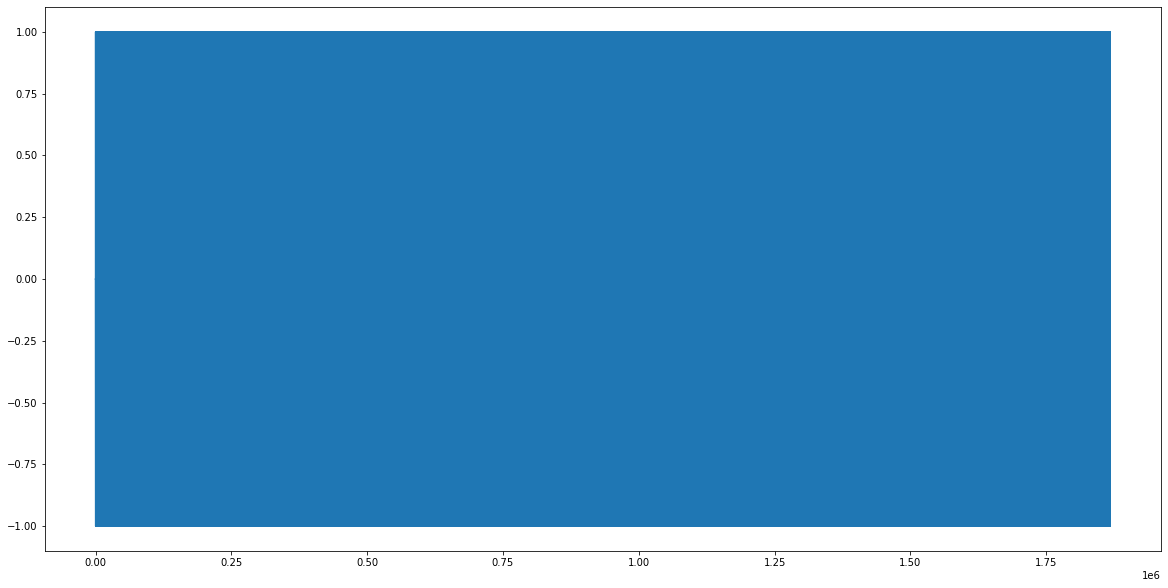

In [17]:
df['Position'].plot(figsize=(20,10))

<AxesSubplot:>

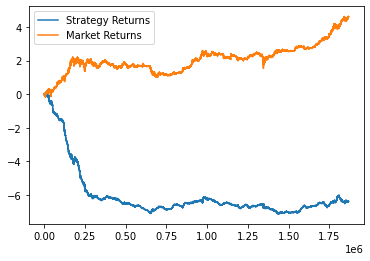

In [18]:
#Set up a column holding the daily Apple returns
df['Market Returns'] = df['close'].pct_change()
#Create column for Strategy Returns by multiplying the daily Apple returns by the position that was held at close
#of business the previous day
df['Strategy Returns'] = df['Market Returns'] * df['Position'].shift(1)
#Finally plot the strategy returns versus Apple returns
df[['Strategy Returns','Market Returns']].cumsum().plot()

/home/mitho/Documents/BTC/env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

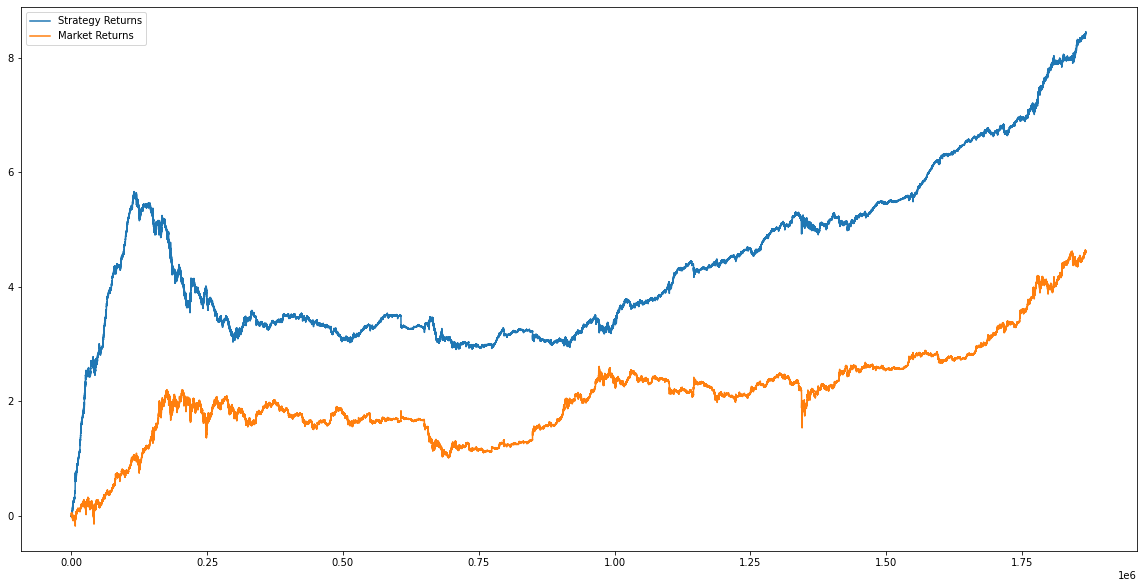

In [19]:
df['L14'] = df['low'].rolling(window=14).min()
df['H14'] = df['high'].rolling(window=14).max()
df['%K'] = 100*((df['close'] - df['L14']) / (df['H14'] - df['L14']) )
df['%D'] = df['%K'].rolling(window=3).mean()
df['Sell Entry'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > 80)
df['Buy Entry'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < 20)
#Create empty "Position" column
df['Position'] = np.nan 
#Set position to -1 for sell signals
df.loc[df['Sell Entry'],'Position'] = -1 
#Set position to -1 for buy signals
df.loc[df['Buy Entry'],'Position'] = 1 
#Set starting position to flat (i.e. 0)
df['Position'].iloc[0] = 0 
#Forward fill the position column to show holding of positions through time
df['Position'] = df['Position'].fillna(method='ffill')
#Set up a column holding the daily Apple returns
df['Market Returns'] = df['close'].pct_change()
#Create column for Strategy Returns by multiplying the daily Apple returns by the position that was held at close
#of business the previous day
df['Strategy Returns'] = df['Market Returns'] * df['Position'].shift(1)
#Finally plot the strategy returns versus Apple returns
df[['Strategy Returns','Market Returns']].cumsum().plot(figsize=(20,10))

In [20]:
df.loc[df['Sell Entry'],'Position']

52        -1.0
58        -1.0
72        -1.0
142       -1.0
157       -1.0
          ... 
1867613   -1.0
1867635   -1.0
1867639   -1.0
1867644   -1.0
1867646   -1.0
Name: Position, Length: 110257, dtype: float64

In [21]:
df.loc[df['Buy Entry'],'Position']

145        1.0
149        1.0
379        1.0
431        1.0
475        1.0
          ... 
1867480    1.0
1867518    1.0
1867569    1.0
1867583    1.0
1867586    1.0
Name: Position, Length: 91747, dtype: float64

In [22]:
df.iloc[-1]

date                1615460580000
open                      55746.3
high                      55770.3
low                       55677.8
close                     55721.3
L14                       55210.8
H14                       55770.3
%K                        91.2479
%D                        92.3374
Sell Entry                   True
Sell Exit                   False
Short                          -1
Buy Entry                   False
Buy Exit                     True
Long                            0
Position                       -1
Market Returns       -0.000448281
Strategy Returns      0.000448281
Name: 1867646, dtype: object